### notes
#### distance in complete network is 1. 

## Random Graphs

In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])
H = nx.path_graph(10)
G.add_nodes_from(H)

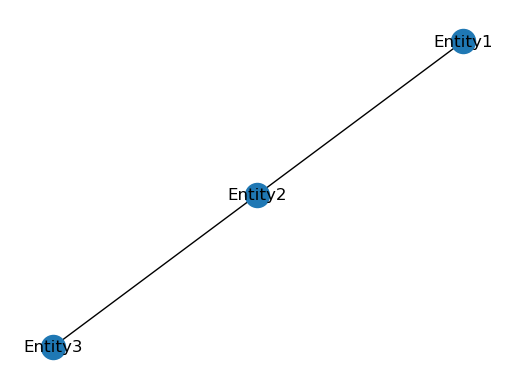

In [3]:
er_graph = nx.Graph()

er_graph.add_node("Entity1")
er_graph.add_node("Entity2")
er_graph.add_node("Entity3")

er_graph.add_edge("Entity1", "Entity2")
er_graph.add_edge("Entity2", "Entity3")

er_graph.add_node("Entity1", color="red")
er_graph.add_edge("Entity1", "Entity2", label="relationship")


import matplotlib.pyplot as plt

fig, ax = plt.subplots()

nx.draw(er_graph, with_labels=True, ax=ax)

plt.show()


### ER Model with G(n, P) using the network X Library. Used the erdos_renyi_graph function to generate a random graph based on the G(n, p) model. The n parameter specifies the number of nodes in the graph, and the p parameter specifies the probability of each pair of nodes being connected by an edge

In [4]:
n = 10  # number of nodes
p = 0.4 # probability of each pair of nodes being connected
er_graph = nx.erdos_renyi_graph(n, p)
nx.set_node_attributes(er_graph, "red", "color")
nx.set_edge_attributes(er_graph, "relationship", "label")

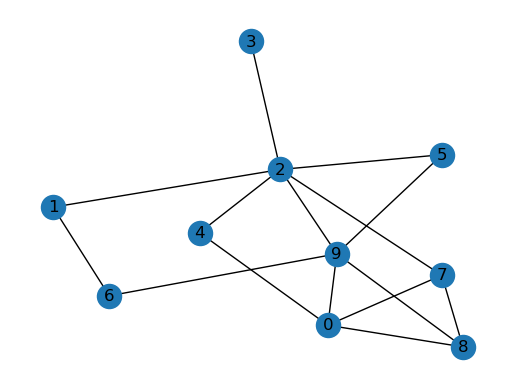

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

nx.draw(er_graph, with_labels=True, ax=ax) #without the with_labels=True there will be no numbers in the node 

plt.show()

#### P(L) is the probability to have L links in network N and probability P. https://www.scribbr.com/statistics/poisson-distribution/  We have to get to k max and k min of the graph

In [6]:
import pandas as pd
data = pd.read_csv("large_twitch_edges.csv")
data.columns

Index(['numeric_id_1', 'numeric_id_2'], dtype='object')

In [7]:
data.head

<bound method NDFrame.head of          numeric_id_1  numeric_id_2
0               98343        141493
1               98343         58736
2               98343        140703
3               98343        151401
4               98343        157118
...               ...           ...
6797552         97507         29359
6797553         71175         12020
6797554        151702        128281
6797555        118034         38021
6797556         27819        153993

[6797557 rows x 2 columns]>

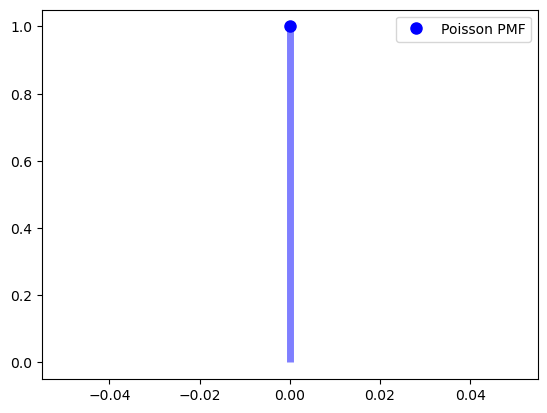

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import poisson
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = np.unique(degree_sequence, return_counts=True)
mu = np.mean(degree_sequence)
poisson_dist = poisson(mu)
x = np.arange(0, max(degree_sequence) + 1)
poisson_pmf = poisson_dist.pmf(x)
plt.plot(x, poisson_pmf, 'bo', ms=8, label='Poisson PMF')
plt.vlines(x, 0, poisson_pmf, colors='b', lw=5, alpha=0.5)
plt.legend(loc='best')
plt.show()





In [9]:

from scipy.stats import chisquare
observed = degree_count[1]
expected = poisson_pmf * len(degree_sequence)
test_result = chisquare(observed, f_exp=expected)
print(test_result)

Power_divergenceResult(statistic=0.0, pvalue=nan)


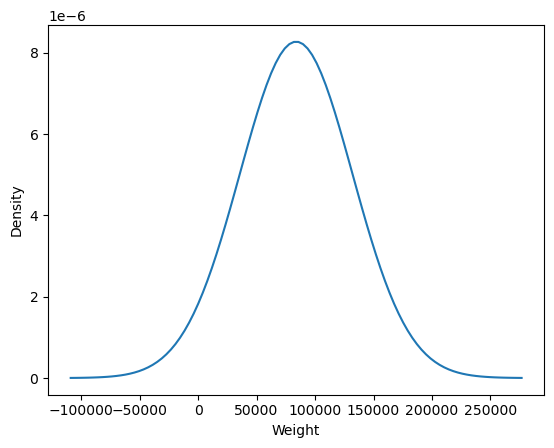

In [10]:
weight = data['numeric_id_1']            

# Calculate mean and standard deviation
mean = np.mean(weight)
std = np.std(weight)

# Generate a range of x values for the plot
x = np.linspace(mean - 4*std, mean + 4*std, 100)

# Calculate the normal distribution curve
y = stats.norm.pdf(x, loc=mean, scale=std)

# Plot the curve
plt.plot(x, y)
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()

              

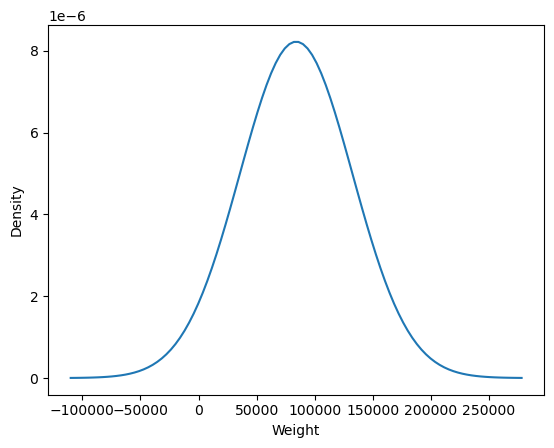

In [11]:
weight = data['numeric_id_2']            

# Calculate mean and standard deviation
mean = np.mean(weight)
std = np.std(weight)

# Generate a range of x values for the plot
x = np.linspace(mean - 4*std, mean + 4*std, 100)

# Calculate the normal distribution curve
y = stats.norm.pdf(x, loc=mean, scale=std)

# Plot the curve
plt.plot(x, y)
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()

#### find number of clustering coffecient, no of nodes, link probab, average degree. to do at home and compare between the random graph you create and the dataset data.

In [12]:
import random
data = data.head(1000)

# Create the graph
G = nx.from_pandas_edgelist(data, source='numeric_id_1', target='numeric_id_2')

# Compute the metrics
num_nodes = G.number_of_nodes()
clustering_coeff = nx.average_clustering(G)
link_prob = nx.density(G)
avg_degree = sum(dict(G.degree()).values()) / num_nodes

# Print the results
print(f"Number of nodes: {num_nodes}")
print(f"Clustering coefficient: {clustering_coeff}")
print(f"Link probability: {link_prob}")
print(f"Average degree: {avg_degree}")

Number of nodes: 998
Clustering coefficient: 0.0030100752235640337
Link probability: 0.002010038130423334
Average degree: 2.004008016032064


In [13]:
import networkx as nx

# Define the parameters of the Erdős-Rényi graph
n = 21  # number of nodes
p = 0.09523809523809523 # probability of each pair of nodes being connected

# Generate the Erdős-Rényi graph
er_graph = nx.erdos_renyi_graph(n, p)

# Calculate the clustering coefficient
clustering_coefficient = nx.average_clustering(er_graph)

# Calculate the number of nodes
num_nodes = er_graph.number_of_nodes()

# Calculate the link probability
link_probability = p

# Calculate the average degree
average_degree = sum(dict(er_graph.degree()).values()) / num_nodes

print("Clustering coefficient:", clustering_coefficient)
print("Number of nodes:", num_nodes)
print("Link probability:", link_probability)
print("Average degree:", average_degree)

#This will print out the clustering coefficient, number of nodes, link probability,and average degree of the 
#Erdős-Rényi graph. Note that the actual values will depend on the specific values of n and p that you choose.


Clustering coefficient: 0.08888888888888889
Number of nodes: 21
Link probability: 0.09523809523809523
Average degree: 2.1904761904761907


### Just a random hit and trial code

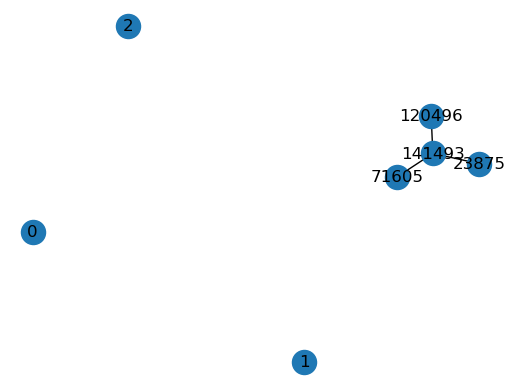

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Define the edges of the graph
edges = random.sample(list(zip(data['numeric_id_1'], data['numeric_id_2'])), 3)

# Generate a list of random nodes
num_nodes = 3
nodes = list(range(num_nodes))

# Create a NetworkX graph object
G = nx.Graph()

# Add the nodes and edges to the graph object
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Create a figure object
fig, ax = plt.subplots()

# Use NetworkX to visualize the graph
nx.draw(G, with_labels=True, ax=ax)

# Show the plot
plt.show()




#### The formula you provided appears to be related to the threshold for connectivity in random graphs, specifically the Erdős–Rényi model. In this model, a graph G(n, p) is generated by starting with n vertices and then adding edges between each pair of vertices independently with probability p. The formula N(1-P(max k)) ≈ 1 is used to determine the threshold for connectivity, where N is the number of vertices in the graph, P is the probability of an edge existing between any two vertices, and k is the maximum degree of the graph. When the probability of an edge existing between any two vertices is such that the expression in the formula is close to 1, the graph is likely to be connected.

#### To understand this formula, let's break it down:

#### N represents the number of vertices in the graph. As the number of vertices increases, the overall connectivity of the graph may change. P is the probability that an edge exists between any two vertices. A higher value for P increases the chance that the graph is connected, while a lower value makes it less likely.max k represents the maximum degree of the graph, i.e., the highest number of edges connected to a single vertex. The expression (1-P)^(max k) represents the probability that there is no edge between a specific vertex and any other vertices with a degree higher than max k. The expression N(1-P)^(max k) then represents the expected number of such vertices in the graph. When N(1-P)^(max k) is close to 1, it means that there is likely only one such vertex in the graph, which suggests that the graph is connected. In other words, the formula provides a threshold condition for the probability P, such that when this condition is met or exceeded, the graph is likely to be connected. the explanation of the formula N[1 - P(max k)] ~ 1

 https://en.wikipedia.org/wiki/Erdős–Rényi_model

### barabasi model and watts strogats with degree Distribution, clustering, diameter

## BA Model

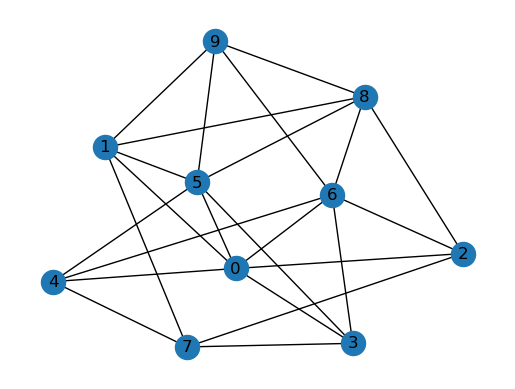

In [15]:
import networkx as nx
import random
import matplotlib.pyplot as plt

ba_graph = nx.Graph()

initial_nodes = 10
m = 3

ba_graph.add_nodes_from(range(initial_nodes))

nodes_list = list(ba_graph.nodes)
degrees = [0] * initial_nodes

desired_nodes = 20

epsilon = 0.1  # Small constant value

for i in range(initial_nodes, desired_nodes):
    probabilities = [degrees[node] + epsilon for node in nodes_list]
    selected_nodes = random.choices(nodes_list, weights=probabilities, k=m)
    ba_graph.add_edges_from((i, node) for node in selected_nodes)
    nodes_list.extend([i] * m)
    nodes_list.extend(selected_nodes)
    degrees.extend([0] * m)
    degrees.extend([degrees[node] + 1 for node in selected_nodes])

G = nx.barabasi_albert_graph(10, 4)

fig, ax = plt.subplots()
nx.draw(G, with_labels=True, ax=ax)

plt.show()


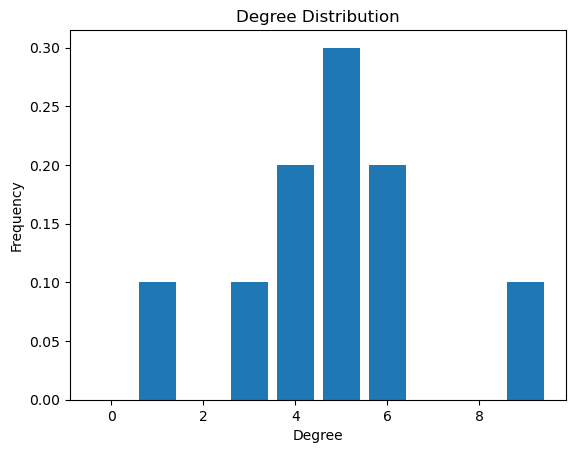

Correlation Coefficient: -0.44300144300144295
Diameter: 2


In [16]:
G = nx.barabasi_albert_graph(10, 4)

# Degree Distribution
degree_sequence = [G.degree(node) for node in G.nodes()]
degree_count = np.bincount(degree_sequence)
degrees = np.arange(len(degree_count))
degree_distribution = degree_count / degree_count.sum()

# Correlation Coefficient
correlation_coefficient = nx.degree_pearson_correlation_coefficient(G)

# Diameter
diameter = nx.diameter(G)

# Plot Degree Distribution
plt.bar(degrees, degree_distribution, align='center')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

print("Correlation Coefficient:", correlation_coefficient)
print("Diameter:", diameter)

In [17]:
import networkx as nx
import random

def barabasi_albert_graph(n, m, seed=None):
    """Returns a random graph according to the Barabási–Albert preferential
    Attachment model.

    A graph of ``n`` nodes is grown by attaching new nodes each with ``m``
    Edges that are preferentially attached to existing nodes with high degree.

    Parameters
    ----------
    n : int
        Number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes
    seed : int, optional
        Seed for random number generator (default=None).

    Returns
    -------
    G : Graph

    Raises
    ------
    NetworkXError
        If ``m`` does not satisfy ``1 <= m < n``.
    """
    if m < 1 or m >= n:
        raise nx.NetworkXError("Barabási–Albert network must have m >= 1 and m < n, m = %d, n = %d" % (m, n))
    
    if seed is not None:
        random.seed(seed)

    # Add m initial nodes (m0 in Barabasi-speak)
    G = nx.empty_graph(m)
    G.name = "barabasi_albert_graph(%s,%s)" % (n, m)

    # Target nodes for new edges
    targets = list(range(m))

    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes = []

    # Start adding the other n-m nodes. The first node is m.
    source = m
    while source < n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source] * m, targets))

        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)

        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source] * m)

        # Now choose m unique nodes from the existing nodes.
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = random.sample(repeated_nodes, m)
        source += 1

    return G




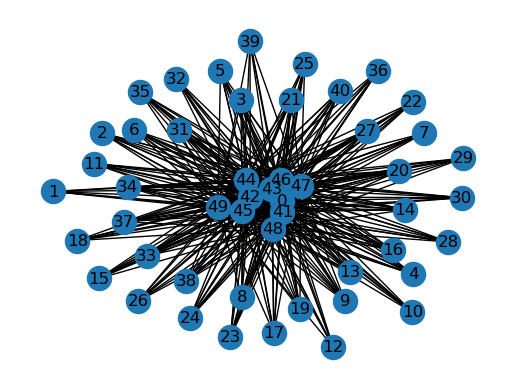

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.barabasi_albert_graph(50, 40)

fig, ax = plt.subplots()
nx.draw(G, with_labels=True, ax=ax)

plt.show()


### Easy way to do it. 

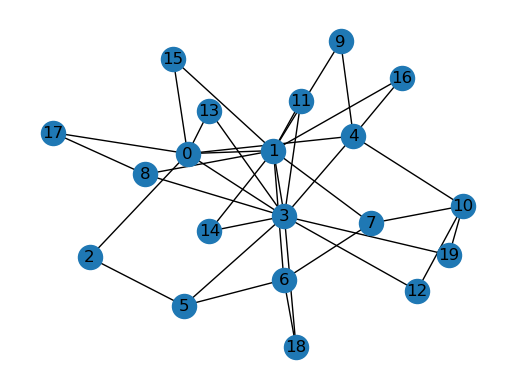

In [19]:
n = 20  # Number of nodes
m = 2  # Number of edges to attach from a new node to existing nodes

ba_graph = nx.barabasi_albert_graph(n, m)
fig, ax = plt.subplots()
nx.draw(ba_graph, with_labels=True, ax=ax)
plt.show()


### watts strogatz

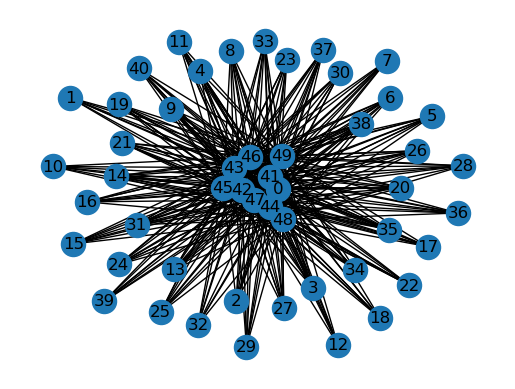

In [20]:
import matplotlib.pyplot as plt

# Parameters
n = 50  # Number of nodes
k = 4   # Each node is connected to k nearest neighbors
p = 0.3  # Probability of rewiring each edge

# Generate Watts-Strogatz graph
y = nx.watts_strogatz_graph(n, k, p)

# Plot the graph
fig, ax = plt.subplots()
nx.draw(G, with_labels=True, ax=ax)
plt.show()

### degree distribution 

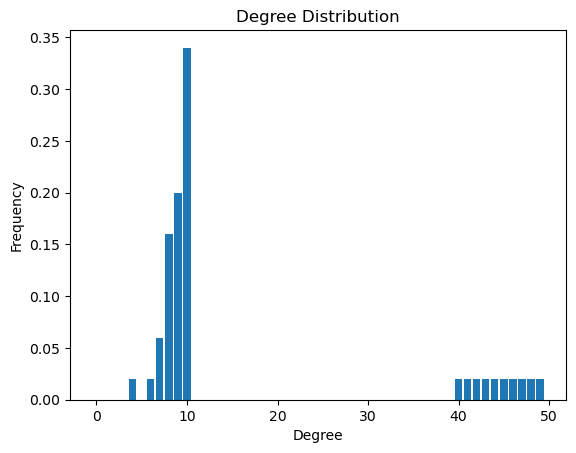

Correlation Coefficient: -0.7907380965003058
Diameter: 2


In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Generate Barabási-Albert graph
G = nx.barabasi_albert_graph(50, 40)

# Degree Distribution
degree_sequence = [G.degree(node) for node in G.nodes()]
degree_count = np.bincount(degree_sequence)
degrees = np.arange(len(degree_count))
degree_distribution = degree_count / degree_count.sum()

# Correlation Coefficient
correlation_coefficient = nx.degree_pearson_correlation_coefficient(G)

# Diameter
diameter = nx.diameter(G)

# Plot Degree Distribution
plt.bar(degrees, degree_distribution, align='center')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

print("Correlation Coefficient:", correlation_coefficient)
print("Diameter:", diameter)


### degree distribution 

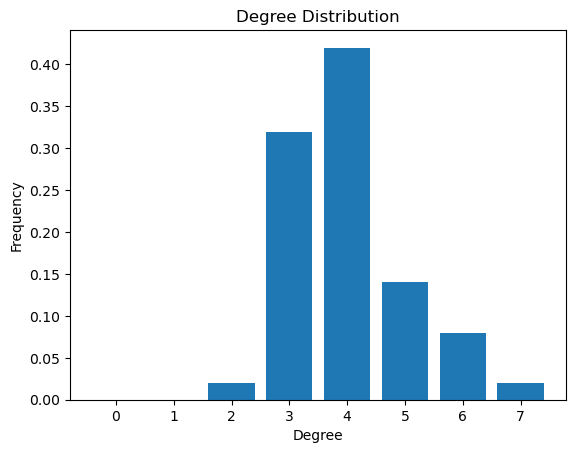

Correlation Coefficient: -0.04025710419485791
Diameter: 6


In [22]:
degree_sequence = [y.degree(node) for node in y.nodes()]
degree_count = np.bincount(degree_sequence)
degrees = np.arange(len(degree_count))
degree_distribution = degree_count / degree_count.sum()

# Correlation Coefficient
correlation_coefficient = nx.degree_pearson_correlation_coefficient(y)

# Diameter
diameter = nx.diameter(y)

# Plot Degree Distribution
plt.bar(degrees, degree_distribution, align='center')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

print("Correlation Coefficient:", correlation_coefficient)
print("Diameter:", diameter)

### comparison with random graph and watts graph

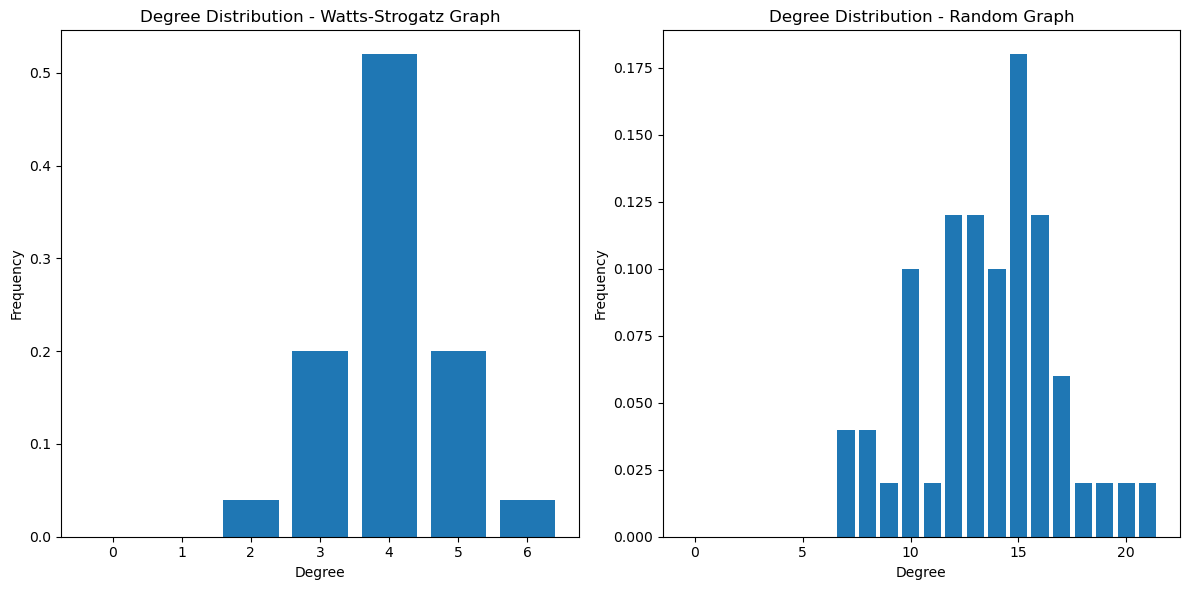

Correlation Coefficient - Watts-Strogatz Graph: 0.011052937754508368
Correlation Coefficient - Random Graph: -0.007645085030122777
Diameter - Watts-Strogatz Graph: 7
Diameter - Random Graph: 3


In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Parameters
n = 50  # Number of nodes
k = 4   # Each node is connected to k nearest neighbors
p = 0.3  # Probability of rewiring each edge

# Generate Watts-Strogatz graph
watts_strogatz_graph = nx.watts_strogatz_graph(n, k, p)

# Generate random graph (Erdos-Renyi model)
random_graph = nx.erdos_renyi_graph(n, p)

# Degree Distribution
degree_sequence_ws = [watts_strogatz_graph.degree(node) for node in watts_strogatz_graph.nodes()]
degree_sequence_random = [random_graph.degree(node) for node in random_graph.nodes()]

degree_count_ws = np.bincount(degree_sequence_ws)
degree_count_random = np.bincount(degree_sequence_random)

degrees_ws = np.arange(len(degree_count_ws))
degrees_random = np.arange(len(degree_count_random))

degree_distribution_ws = degree_count_ws / degree_count_ws.sum()
degree_distribution_random = degree_count_random / degree_count_random.sum()

# Correlation Coefficient
correlation_coefficient_ws = nx.degree_pearson_correlation_coefficient(watts_strogatz_graph)
correlation_coefficient_random = nx.degree_pearson_correlation_coefficient(random_graph)

# Diameter
diameter_ws = nx.diameter(watts_strogatz_graph)
diameter_random = nx.diameter(random_graph)

# Plot Degree Distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(degrees_ws, degree_distribution_ws, align='center')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution - Watts-Strogatz Graph')

plt.subplot(1, 2, 2)
plt.bar(degrees_random, degree_distribution_random, align='center')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution - Random Graph')

plt.tight_layout()
plt.show()

# Print Correlation Coefficients and Diameter
print("Correlation Coefficient - Watts-Strogatz Graph:", correlation_coefficient_ws)
print("Correlation Coefficient - Random Graph:", correlation_coefficient_random)

print("Diameter - Watts-Strogatz Graph:", diameter_ws)
print("Diameter - Random Graph:", diameter_random)


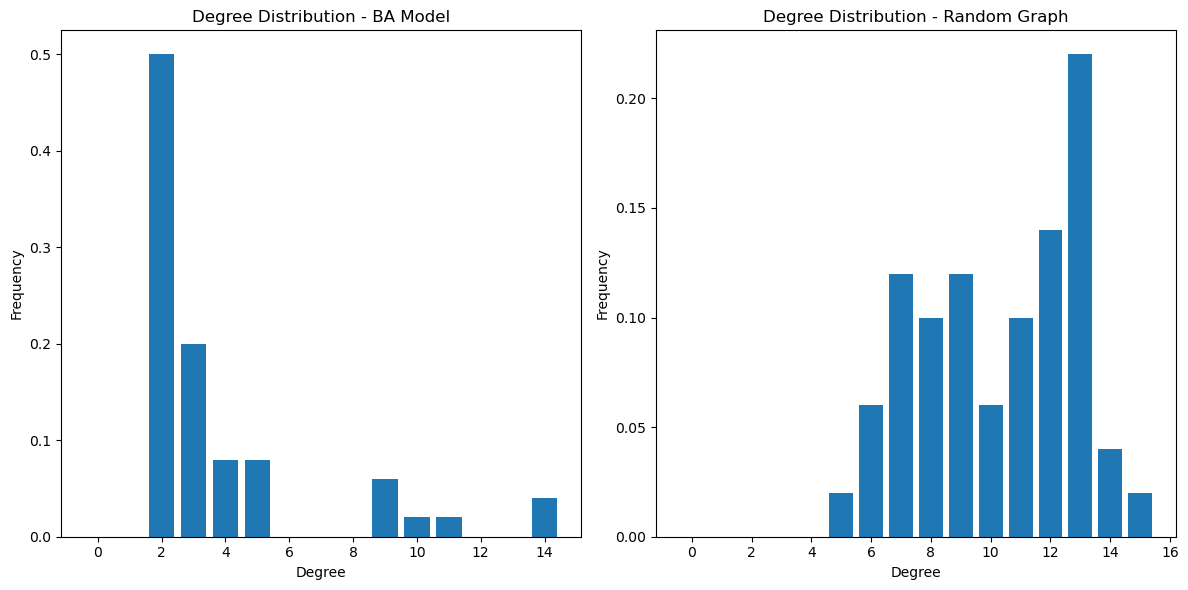

Correlation Coefficient - BA Model: -0.2987736192385232
Diameter - BA Model: 4
Diameter - Random Graph: 3


In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Parameters
n = 50  # Number of nodes
m = 2   # Number of edges to attach from a new node to existing nodes
p = 0.2  # Probability of rewiring each edge (for random graph)

# Generate BA model graph
ba_graph = nx.barabasi_albert_graph(n, m)

# Generate random graph (Erdos-Renyi model)
random_graph = nx.erdos_renyi_graph(n, p)

# Degree Distribution
degree_sequence_ba = [ba_graph.degree(node) for node in ba_graph.nodes()]
degree_sequence_random = [random_graph.degree(node) for node in random_graph.nodes()]

degree_count_ba = np.bincount(degree_sequence_ba)
degree_count_random = np.bincount(degree_sequence_random)

degrees_ba = np.arange(len(degree_count_ba))
degrees_random = np.arange(len(degree_count_random))

degree_distribution_ba = degree_count_ba / degree_count_ba.sum()
degree_distribution_random = degree_count_random / degree_count_random.sum()

# Correlation Coefficient (BA model only)
correlation_coefficient_ba = nx.degree_pearson_correlation_coefficient(ba_graph)

# Diameter
diameter_ba = nx.diameter(ba_graph)
diameter_random = nx.diameter(random_graph)

# Plot Degree Distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(degrees_ba, degree_distribution_ba, align='center')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution - BA Model')

plt.subplot(1, 2, 2)
plt.bar(degrees_random, degree_distribution_random, align='center')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution - Random Graph')

plt.tight_layout()
plt.show()

# Print Correlation Coefficient and Diameter (for BA model only)
print("Correlation Coefficient - BA Model:", correlation_coefficient_ba)
print("Diameter - BA Model:", diameter_ba)

print("Diameter - Random Graph:", diameter_random)


### Eugen Value Vector 

### The one with the highest value is the most useful one

In [25]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4,5), (5,6), (6,2), (7,1), (8,3), (8,5)])


centrality = nx.eigenvector_centrality(G)

for node, score in centrality.items():
    print(f"Node {node}: {score}")

Node 1: 0.3978007284848305
Node 2: 0.4319046363218686
Node 3: 0.5216571675258119
Node 4: 0.30489452268811507
Node 5: 0.3196859613441964
Node 6: 0.27236887516833114
Node 7: 0.1441579242986922
Node 8: 0.30489452268811507


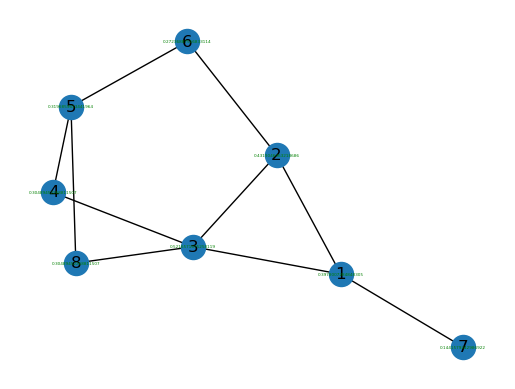

In [26]:

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4,5), (5,6), (6,2), (7,1), (8,3), (8,5)])

centrality = nx.eigenvector_centrality(G)

p = nx.spring_layout(G)  
nx.draw_networkx(G, p)

#  node labels
nx.draw_networkx_labels(G, p, labels=centrality, font_size=3, font_color='g')



plt.axis('off')
plt.show()


In [27]:
G = nx.DiGraph()
G.add_edges_from(([(1, 2), (1, 3), (2, 1), (3, 2), (4,1), (4,5), (5,3), (6,1), (7,6), (8,2)]))

# Calculate PageRank scores
pagerank = nx.pagerank(G)

# Print PageRank scores for each node
for node, score in pagerank.items():
    print(f"Node {node}: {score}")


Node 1: 0.3486495585651668
Node 2: 0.34405719154463704
Node 3: 0.1896369998901959
Node 4: 0.018750000000000003
Node 5: 0.026718750000000003
Node 6: 0.0346875
Node 7: 0.018750000000000003
Node 8: 0.018750000000000003


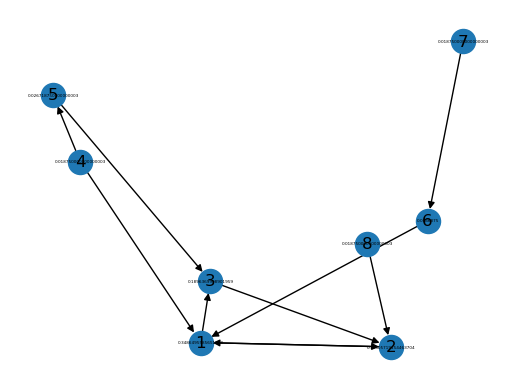

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a network (graph)
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 1), (3, 2), (4,1), (4,5), (5,3), (6,1), (7,6), (8,2)])

# Calculate PageRank scores
pagerank = nx.pagerank(G)

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualizing the graph
nx.draw_networkx(G, pos)

# Draw node labels
nx.draw_networkx_labels(G, pos, labels=pagerank, font_size=3, font_color='black')

# Show the graph
plt.axis('off')
plt.show()

### Degree Centrality

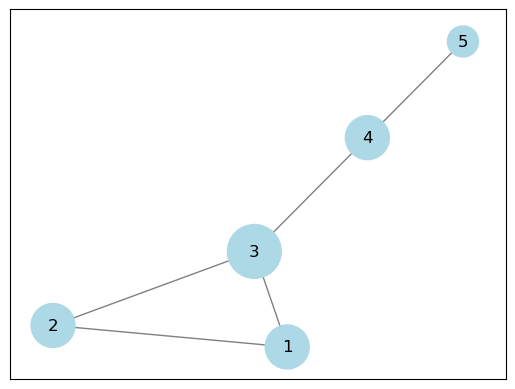

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an example undirected network
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

# Calculate the degree centrality
degree_centrality = nx.degree_centrality(G)

# Set the node size based on degree centrality
node_size = [2000 * degree_centrality[node] for node in G.nodes()]

# Visualize the graph with node sizes based on degree centrality
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12)

# Display the graph
plt.show()


In [30]:
import networkx as nx

# Create an example undirected network
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

# Calculate the degree centrality
degree_centrality = nx.degree_centrality(G)

# Print the degree centrality for each node
for node, centrality in degree_centrality.items():
    print(f"Node {node}: Degree Centrality = {centrality}")


Node 1: Degree Centrality = 0.5
Node 2: Degree Centrality = 0.5
Node 3: Degree Centrality = 0.75
Node 4: Degree Centrality = 0.5
Node 5: Degree Centrality = 0.25


### Betweeness centrality

In [32]:
import networkx as nx

# Create an example undirected network
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

# Calculate the betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Print the betweenness centrality for all nodes
print("Node\tBetweenness Centrality")
for node, centrality in betweenness_centrality.items():
    print(f"{node}\t{centrality}")


Node	Betweenness Centrality
1	0.0
2	0.0
3	0.6666666666666666
4	0.5
5	0.0


/var/folders/q8/jzgm7n951lqgsqnmjhf4541w0000gn/T/ipykernel_4153/4042727222.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Betweenness Centrality")


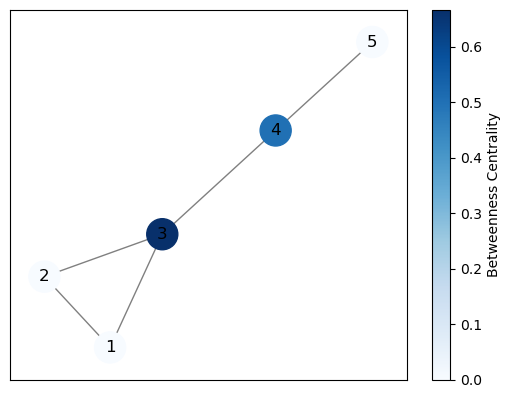

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an example undirected network
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

# Calculate the betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Set the node color based on betweenness centrality
node_color = [betweenness_centrality[node] for node in G.nodes()]

# Visualize the graph with betweenness centrality
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12)

# Add a colorbar to show the betweenness centrality values
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Betweenness Centrality")

# Display the graph
plt.show()


#### strength of ties

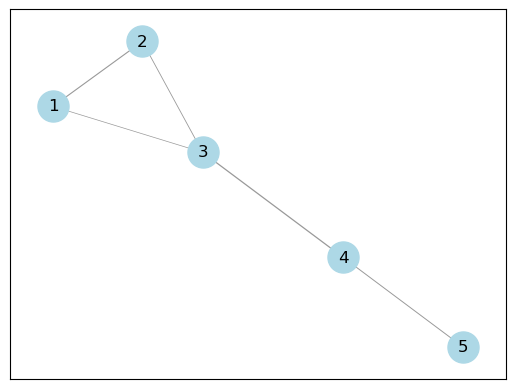

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an example undirected network with tie strengths
G = nx.Graph()
G.add_edges_from([(1, 2, {'strength': 0.8}),
                  (1, 3, {'strength': 0.5}),
                  (2, 3, {'strength': 0.6}),
                  (3, 4, {'strength': 0.9}),
                  (4, 5, {'strength': 0.7})])

# Extract the tie strengths as edge thickness
edge_thickness = [data['strength'] for _, _, data in G.edges(data=True)]

# Visualize the graph with edge thickness based on tie strength
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw_networkx_edges(G, pos, width=edge_thickness, edge_color='gray', alpha=0.8)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, font_size=12)

# Display the graph
plt.show()
